# HW1: Practice with Python, hard-margin SVM, linear regression, and logistic regression

[Name: Zeyang Yu/NetID: zyu355]

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model, datasets
from sklearn.model_selection import train_test_split

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/mtcars.csv](http://www.stat.wisc.edu/~jgillett/451/data/mtcars.csv) into a DataFrame.
- The hard-margin SVM we saw in section 01 requires linearly-separable data. With that in mind,
  remove two outliers from the data, namely the 'Toyota Corona' and 'Maserati Bora'.
  (I'm not sure "outliers" is the right word, but these two cars would be on the wrong side
  of the natural decision boundary.)
- From the remaining 30 cars, make a 30x2 numpy array X from the mpg (miles per gallon) and wt
  (weight in 1000s of pounds) columns. Make an array y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car (from 1974) weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

The decision boundary is -8.24 * weight + -0.309 * mileage + 32.0 = 0.
The training accuracy is 1.0.
We predict that a car weighing 4 thousand pounds that gets 20 mpg has transmission type 0 (where 0=automatic, 1=manual).


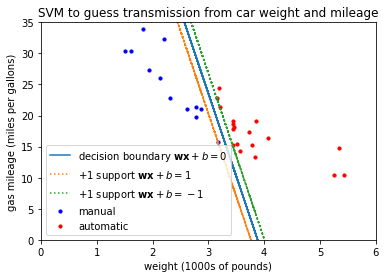

In [200]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/mtcars.csv')
df_new = df[df['Unnamed: 0'] != 'Toyota Corona']
df_new = df_new[df_new['Unnamed: 0'] != 'Maserati Bora']

X = np.array(df_new.loc[:,['wt','mpg']])
y = np.array(df_new["am"])


clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]
b = clf.intercept_[0]

print(f'The decision boundary is {w1:.3} * weight + {w2:.3} * mileage + {b:.3} = 0.')
print(f'The training accuracy is {clf.score(X, y)}.')

y_predict = clf.predict([[4,20]])
print(f'We predict that a car weighing 4 thousand pounds that gets 20 mpg has transmission type {y_predict[0]} (where 0=automatic, 1=manual).')

# plot the data

plt.scatter(x=X[y>0][:, 0], y=X[y>0][:, 1], c="b", cmap=plt.cm.Paired, label='manual', s=10)
plt.scatter(x=X[y==0][:, 0], y=X[y==0][:, 1], c="r", cmap=plt.cm.Paired, label='automatic', s=10)

plt.xlim(0, 6)
plt.ylim(0, 35)

plt.title('SVM to guess transmission from car weight and mileage')
plt.xlabel('weight (1000s of pounds)')
plt.ylabel('gas mileage (miles per gallons)')

# add the decision boundary and margin boundaries
x1 = X[:, 0]
x2 = -(clf.coef_[0][0] * x1 + clf.intercept_) / clf.coef_[0][1]
plt.plot(x1, x2, label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.plot(x1, x2 + 1 / clf.coef_[0][1], ':', label=r'+1 support $\mathbf{wx} + b =  1$')
plt.plot(x1, x2 - 1 / clf.coef_[0][1], ':', label=r'+1 support $\mathbf{wx} + b = -1$')

plt.legend()
plt.show(block=False)

# 2 Make two linear regression models:
one to estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization; and the other to estimate the same volume from both market capitalization and price.

## 2a Make a simple linear regression model
of $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.

The model is Volume = 2.68e-05 * (Market Capitalization) + 3.41e+06.
R^2 is 0.705.
We predict a Volume of 1.01e+07 for a company with Market Capitalization 2.5e+11 (see red dot).


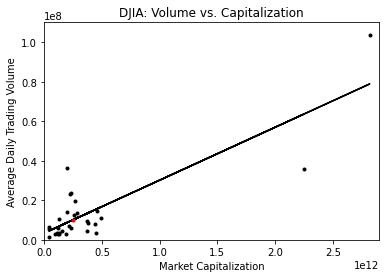

In [63]:
data = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv')
x = data['MarketCap'].to_numpy()
X = x.copy()
nrows = X.shape[0]
X.shape = (nrows, 1)

y = data['AvgVol'].to_numpy()

model = linear_model.LinearRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
print(f'The model is Volume = {w:.3} * (Market Capitalization) + {b:.3}.')

print(f'R^2 is {model.score(X, y):.3}.')

predict_volume = 0.25e12 * w + b
print(f'We predict a Volume of {predict_volume:.3} for a company with Market Capitalization 2.5e+11 (see red dot).')

#plot data
y_hat = model.predict(X)
plt.plot(X, y, '.', color='black')
plt.title('DJIA: Volume vs. Capitalization')
plt.xlabel('Market Capitalization')
plt.ylabel('Average Daily Trading Volume')
plt.xlim(0, 2900000000000)
plt.ylim(0, 110000000)

plt.plot(x, y_hat, color='black',
         label=f'$\\hat{{y}}=${round(b, 2)} + ({round(w, 2)})$x$')

plt.plot(0.25e12, predict_volume, '.', color='red')

## 2b Make a multiple linear regression model
of $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.

In [61]:
X = data[['MarketCap', 'Price']].to_numpy()
y = data['AvgVol'].to_numpy()
model.fit(X, y)
print(f'The model is Volume = {model.coef_[0]:.3} * (Market Capitalization) + {model.coef_[1]:.3} * Price + {model.intercept_:.3}.')
print(f'R^2 is {model.score(X, y):.3}.')

The model is Volume = 2.89e-05 * (Market Capitalization) + -6.69e+04 * Price + 1.44e+07.
R^2 is 0.823.


## 3 Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Set a variable X to a 100x1 array of Petal.Length values.
- Set a variable y to an array indicating whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Run "X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)" to
  set the four arrays on the left to subsets of 75% of the data for training and 25%
  for testing.
- Train the model on the training examples.
- Report its accuracy on the training examples and its accuracy on the test examples.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Make a plot showing the training data and estimated logistic curve.

The model is P(Species= "virginica" | x) = f(x) = 1 / (1 + exp(-(3.35*x + -16.2)))
Training accuracy=0.947, test accuracy=0.88.
Estimated P(Species=virginica | Petal.Length=5)=0.636.


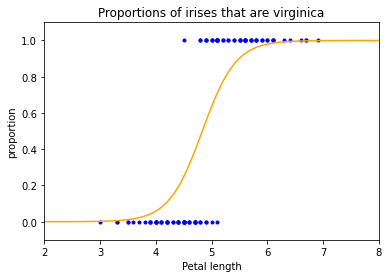

In [283]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/iris.csv')
df_new = df[df['Species'] != 'setosa']
df_new = df_new[['Petal.Length', 'Species']]
x = df_new['Petal.Length'].to_numpy()
X = x.copy()
nrows = X.shape[0]
X.shape = (nrows, 1)

y = (df_new['Species'] == 'virginica').to_numpy().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
b = model.intercept_
w = model.coef_[0]

print(f'The model is P(Species= "virginica" | x) = f(x) = 1 / (1 + exp(-({w[0]:.3}*x + {b[0]:.3})))')
print(f'Training accuracy={model.score(X_train, y_train):.3}, test accuracy={model.score(X_test, y_test)}.')

predict = 1 / (1 + np.exp(-(w[0]*5 + b[0])))
print(f'Estimated P(Species=virginica | Petal.Length=5)={predict:.3}.')

# plot data
low = 2
high = 8
plt.plot(X, y, '.', color = 'blue')
plt.xlim(low, high)
margin = 0.1
plt.ylim(0 - margin, 1 + margin)
plt.title('Proportions of irises that are virginica')
plt.xlabel('Petal length')
plt.ylabel('proportion')
plt.xlim(low, high)

#plot curve
xplot = np.linspace(start=low, stop=high)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, color = 'orange', label='logistic curve')